In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [3]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/data/ME_scans/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

# Single Figs

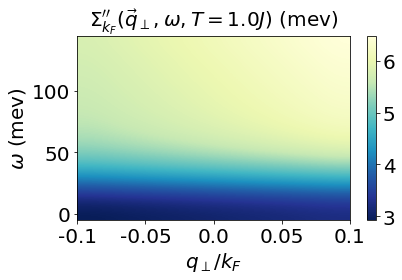

In [4]:

path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=1.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T="+str(T)+"J)$ (mev)", size=20)
    ylabel(r"$\omega$ (mev)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    # savefig("imgs/pap_fig1c.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')



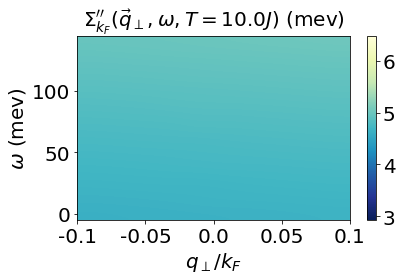

In [5]:

path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=10.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T="+str(T)+"J)$ (mev)", size=20)
    ylabel(r"$\omega$ (mev)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    # savefig("imgs/pap_fig1d.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')


# Panels

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


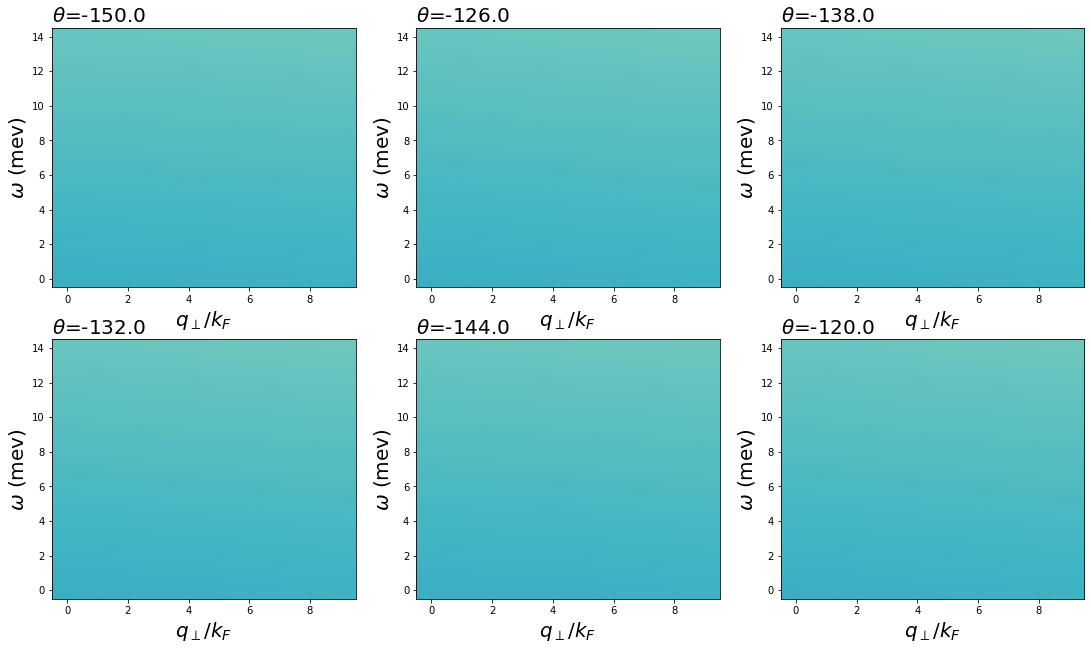

In [6]:

path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=10.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df2, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


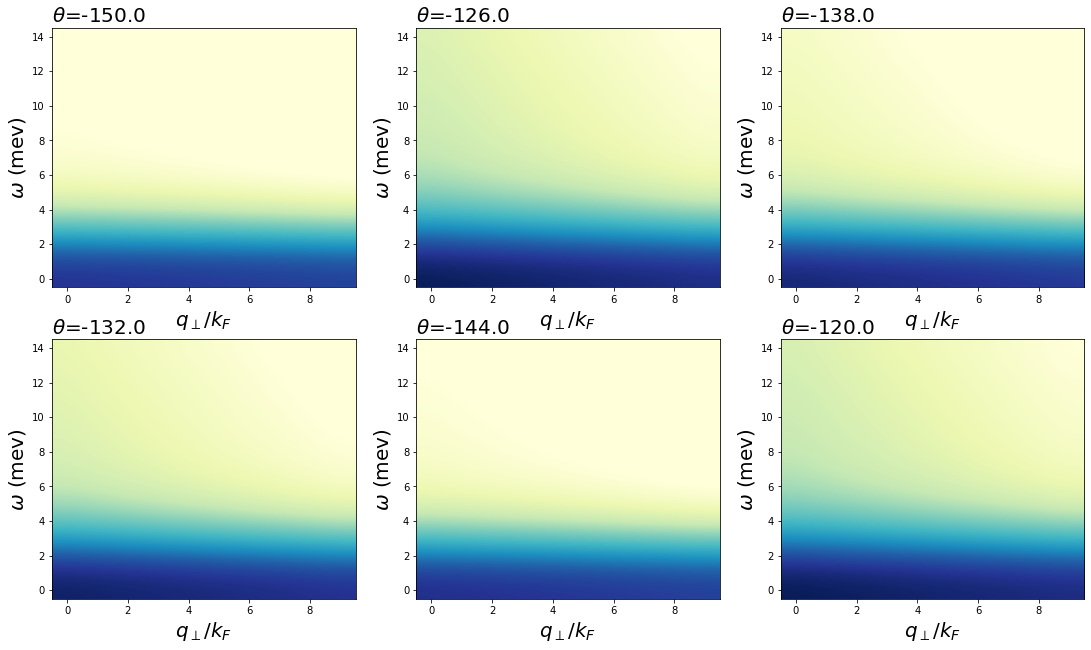

In [7]:


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=1.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df2, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()

# Extracting fits at low $\omega$, $q$, $T$

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
1

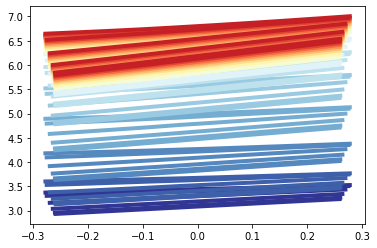

In [8]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    
    

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
1

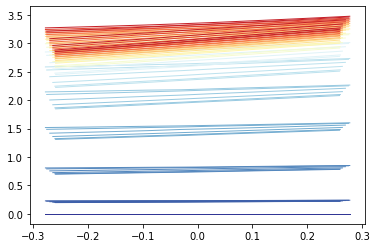

In [9]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s]-d.iloc[0], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    


[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
1

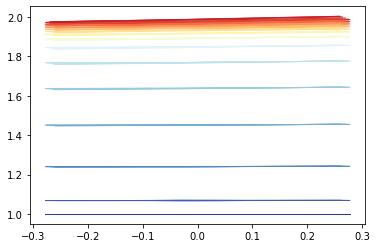

In [10]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s]/d.iloc[0], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(150, 18) 10
(150, 18) 10
(150, 18) 10
(150, 18) 10
(150, 18) 10


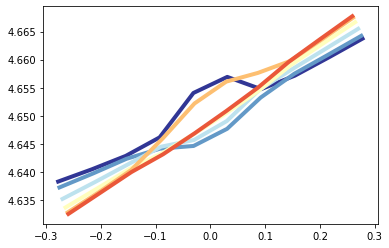

In [11]:
path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    plot(d.iloc[0], linewidth=4, color=plt.cm.RdYlBu_r(l/float(6)))


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
1

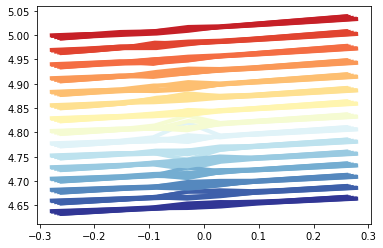

In [12]:
path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'

df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    


[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(15, 10) 10
(150, 18) 10
(15, 10) 10
(150, 18) 10
(15, 10) 10
(150, 18) 10
(15, 10) 10
(150, 18) 10
(15, 10) 10
(150, 18) 10
(15, 10) 10


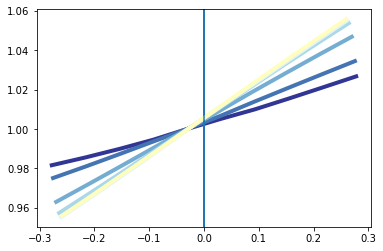

In [13]:

path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sQ=np.size(Q)
    print(np.shape(d), sQ)
    plot(d.iloc[0]/d.iloc[0,int(sQ/2-1 )], linewidth=4, color=plt.cm.RdYlBu_r(l/float(sQ)))
    axvline(0)
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu, l=l)
        

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
0
1
2
3
4
5
6
7
8
9
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
(150, 18) 10
0
1
2
3
4
5
6
7
8
9


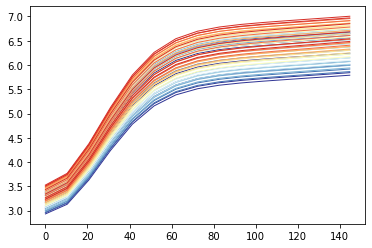

In [14]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        print(s)
        plot(d.iloc[s], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    

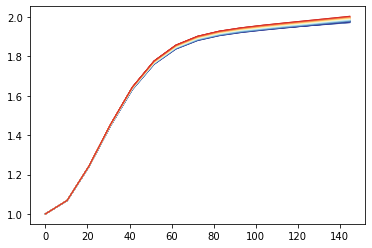

In [15]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
# print(Qu)

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        plot(d.iloc[s]/d.iloc[s,0], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))

    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    # print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(10,) (15, 10)
maxQ 0.27771169311077115 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.27537839722745766 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26971170775210573 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2642308163908099 -132.0
(150, 18)

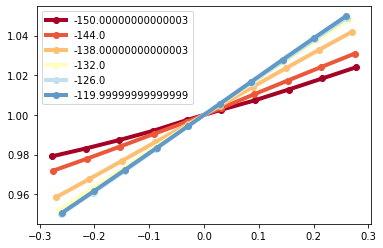

In [16]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)


def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    plot(d.iloc[0]/mid, linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

plt.legend()

In [17]:
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
fill=0.5
def Fermi_Vel(kx,ky):
    
        sq3y2=np.sqrt(3)*ky/2
        sq3y=np.sqrt(3)*ky
        vx=-tp1*(-2*np.cos(sq3y2)*np.sin(kx/2)-2*np.sin(kx)) +6*tp2*np.cos(sq3y2)*np.sin(3*kx/2)
        vy=2*np.sqrt(3)*tp1*np.cos(kx/2)*np.sin(sq3y2)-2*np.sqrt(3)*tp2*(-np.cos(3*kx/2)*np.sin(sq3y2)-np.sin(sq3y))
        return [vx,vy]

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(10,) (15, 10)
velo 139.53269595663636
maxQ 0.27771169311077115 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
velo 149.03893032589374
maxQ 0.27537839722745766 -144.0
(150, 18) 10
(10,) (15, 10)
velo 170.40930221292086
maxQ 0.26971170775210573 -138.00000000000

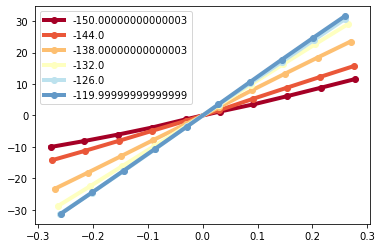

In [18]:


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

# def fit(df, *args,axi,Q,w,l):
#     d = df.pivot(index=args[1], columns=args[0], values=args[2])
#     sW=np.size(w)
    
#     plot(d.iloc[l], linewidth=4,marker='o',  color=plt.cm.RdYlBu_r(l/float(6)))
    


# thets=df['theta'].unique()
# # thets=[df['theta'].unique()[0]]
# df=df.sort_values(by=[ 'freq','T','theta'])
# for l,th in enumerate(thets):
#     df2=df.loc[(df['theta'] ==th )]
#     print(np.shape(df2), np.size(Qu))
#     Qu=df2['Q'].unique()
#     w=df2['freq'].unique()
#     fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    [vx,vy]=Fermi_Vel(df['KFX'][0],df['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)

    plot((d.iloc[0]-mid)*vf, linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)
    

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

plt.legend()

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(10,) (15, 10)
maxQ 0.27771169311077115 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.27537839722745766 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26971170775210573 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2642308163908099 -132.0
(150, 18)

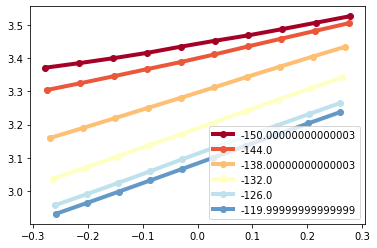

In [19]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)

# def fit(df, *args,axi,Q,w,l):
#     d = df.pivot(index=args[1], columns=args[0], values=args[2])
#     sW=np.size(w)
    
#     plot(d.iloc[l], linewidth=4,marker='o',  color=plt.cm.RdYlBu_r(l/float(6)))
    


# thets=df['theta'].unique()
# # thets=[df['theta'].unique()[0]]
# df=df.sort_values(by=[ 'freq','T','theta'])
# for l,th in enumerate(thets):
#     df2=df.loc[(df['theta'] ==th )]
#     print(np.shape(df2), np.size(Qu))
#     Qu=df2['Q'].unique()
#     w=df2['freq'].unique()
#     fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)
    

def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    plot(d.iloc[0], linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

plt.legend()

[ 0.03085685 -0.03085685  0.09257056 -0.09257056  0.15428427 -0.15428427
  0.21599798 -0.21599798  0.27771169 -0.27771169  0.0305976  -0.0305976
  0.0917928  -0.0917928   0.152988   -0.152988    0.2141832  -0.2141832
  0.2753784  -0.2753784   0.02996797 -0.02996797 -0.0899039   0.0899039
 -0.14983984  0.14983984 -0.20977577  0.20977577  0.26971171 -0.26971171
  0.02935898 -0.02935898  0.08807694 -0.08807694  0.1467949  -0.1467949
  0.20551286 -0.20551286  0.26423082 -0.26423082  0.0289302  -0.0289302
  0.08679061 -0.08679061  0.14465102 -0.14465102  0.20251143 -0.20251143
  0.26037184 -0.26037184  0.02878518 -0.02878518  0.08635553 -0.08635553
  0.14392589 -0.14392589  0.20149624 -0.20149624  0.2590666  -0.2590666 ]
(150, 18) 60
(10,) (15, 10)
maxQ 0.27771169311077115 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.27537839722745766 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26971170775210573 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2642308163908099 -132.0
(150, 18)

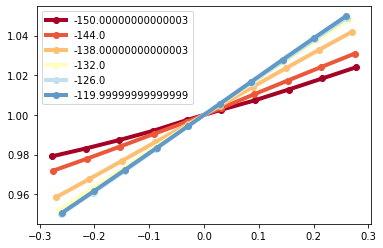

In [20]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
print(Qu)


def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    plot(d.iloc[0]/mid, linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

plt.legend()

velo 139.53269595663636
velo 149.03893032589374
velo 170.40930221292086
velo 189.25338731311234
velo 201.64310241983193
velo 205.686784477488


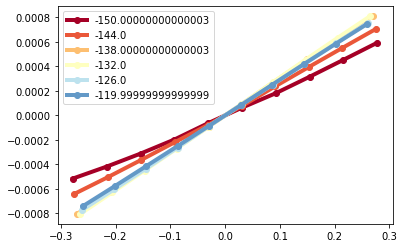

In [21]:


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
# print(Qu)



def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    # print(np.shape(Q), np.shape(d))
    [vx,vy]=Fermi_Vel(df['KFX'][0],df['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)

    plot((d.iloc[0]-mid)/vf, linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    # print('maxQ',np.max(Q),thets[l]*180/np.pi)
    

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    # print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)

plt.legend()

velo 139.53269595663636
[3.44473095 0.28062288] [[7.00065148e-07 3.91112365e-22]
 [3.91112365e-22 2.22803143e-05]] (10,)
velo 149.03893032589374
[3.40216136 0.36662102] [[ 3.61477238e-07 -2.05386788e-22]
 [-2.05386788e-22  1.17001726e-05]] (10,)
velo 170.40930221292086
[3.2970225  0.51135735] [[ 3.06097429e-08 -6.01944894e-15]
 [-6.01944894e-15  1.03283543e-06]] (10,)
velo 189.25338731311234
[3.18957146 0.58002599] [[2.75889540e-08 1.70262735e-23]
 [1.70262735e-23 9.69927717e-07]] (10,)
velo 201.64310241983193
[3.11157166 0.59318215] [[6.25952853e-08 3.97836760e-23]
 [3.97836760e-23 2.26633798e-06]] (10,)
velo 205.686784477488
[3.08396102 0.59184731] [[ 2.76431122e-08 -0.00000000e+00]
 [ 0.00000000e+00  1.01096263e-06]] (10,)


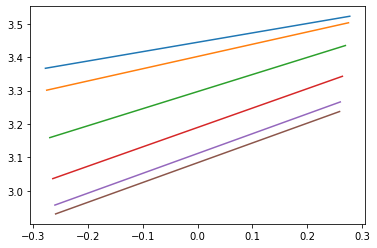

In [28]:
def scalingQ(omega, a,b):
    return a+b*omega


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
# print(Qu)

alphaT=[]
AT=[]
Tf=[]


def fit(df, *args,axi,Q,w,l):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    # print(np.shape(Q), np.shape(d))
    [vx,vy]=Fermi_Vel(df['KFX'][0],df['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)
    y=d.iloc[0]
    popt, pcov = curve_fit(scalingQ, np.sort(np.array(Q)),np.array(d.iloc[0]))
    print(popt,pcov, np.shape(d.iloc[0]))
    # plot(Q,scalingQ(Q, popt[0],popt[1]))
    # plot(Q,d.iloc[0], linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    plot(np.sort(np.array(Q)),scalingQ(np.sort(np.array(Q)), popt[0],popt[1]))
    # plot(np.sort(np.array(Q)),np.array(d.iloc[0]), linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    # print('maxQ',np.max(Q),thets[l]*180/np.pi)
    alphaT.append(popt[0])
    AT.append(popt[1])
    Tf.append(thets[l])

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    # print(np.shape(df2), np.size(Qu))
    Qu=df2['Q'].unique()
    w=df2['freq'].unique()
    fit(df2, 'Q', 'freq', 'SE', axi= axis[i,j], Q=Qu,w=w,l=l)



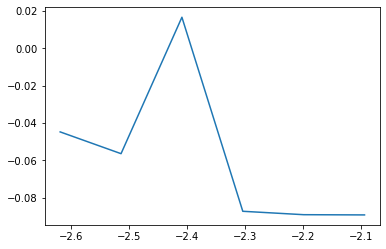

In [ ]:
plt.plot(Tf, AT)

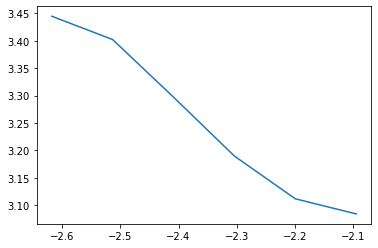

In [50]:
plt.plot(Tf, alphaT)